# 다중분류 텐서플로 1.x

In [ ]:
%tensorflow_version 1.x
import tensorflow as tf
import numpy as np
from tensorflow.nn import relu
tf.enable_eager_execution()

In [ ]:
X = np.array([
               [0,0],
               [1,0],
               [1,1],
               [0,0],
               [0,1]
],dtype='float32')

y = np.array([
               [1,0,0],
               [0,1,0],
               [0,0,1],
               [1,0,0],
               [0,0,1]
            ],dtype="float32")

In [ ]:
X.shape

(5, 2)

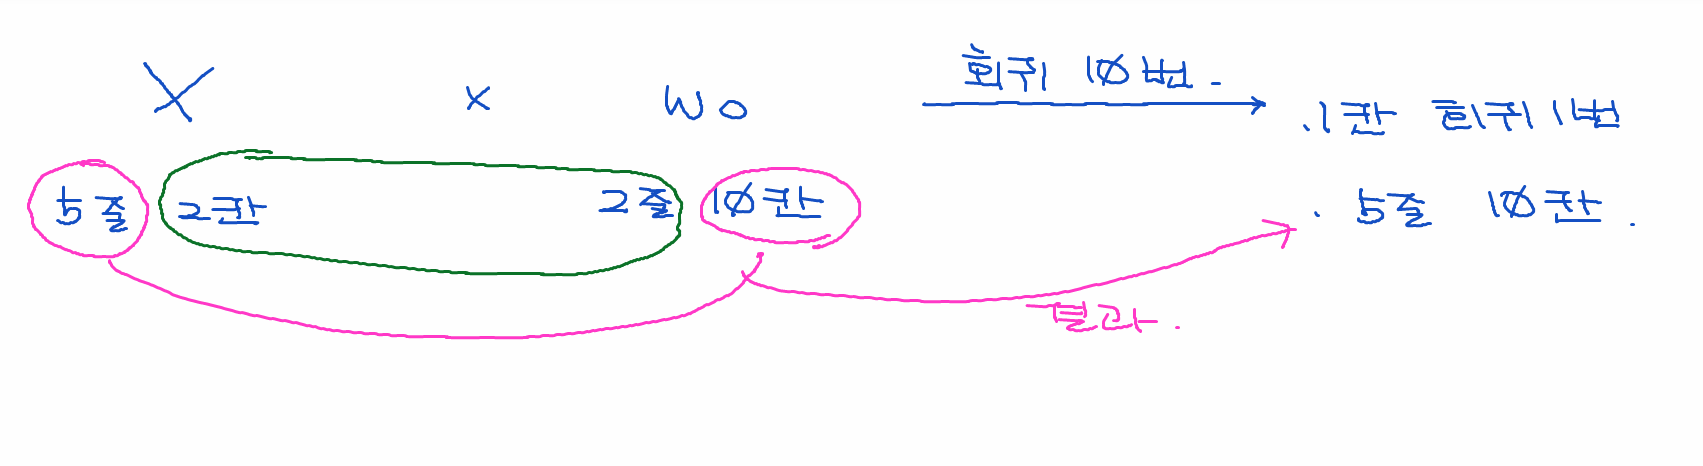

In [ ]:
# cost가 0으로 수렴하는데 적절한 w,b 선택해줌
# w,b를 초기화 시키는 객체 생성
initializer = tf.contrib.layers.xavier_initializer()

# 2줄 10칸 생성
w0 = tf.Variable(initializer([2,10]))
# 10줄 1칸 생성
b0 = tf.Variable(initializer([10]))

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [ ]:
hypothesis0 = tf.sigmoid( tf.matmul(X,w0)+b0 )
hypothesis0

<tf.Tensor: id=34, shape=(5, 10), dtype=float32, numpy=
array([[0.5433646 , 0.52129924, 0.6186897 , 0.56115824, 0.54786146,
        0.38836616, 0.37182733, 0.554239  , 0.5423512 , 0.42157304],
       [0.6621013 , 0.5073151 , 0.56262964, 0.58087325, 0.44657055,
        0.5155429 , 0.51429176, 0.64500177, 0.40671575, 0.4252413 ],
       [0.65367925, 0.58089185, 0.60978603, 0.63717026, 0.5585557 ,
        0.41390622, 0.61140764, 0.52853674, 0.5390499 , 0.37740982],
       [0.5433646 , 0.52129924, 0.6186897 , 0.56115824, 0.54786146,
        0.38836616, 0.37182733, 0.554239  , 0.5423512 , 0.42157304],
       [0.53406566, 0.5944571 , 0.6634177 , 0.6183635 , 0.65517676,
        0.29645893, 0.46796018, 0.43412122, 0.6690495 , 0.37388572]],
      dtype=float32)>

In [ ]:
hypothesis0.shape

TensorShape([Dimension(5), Dimension(10)])

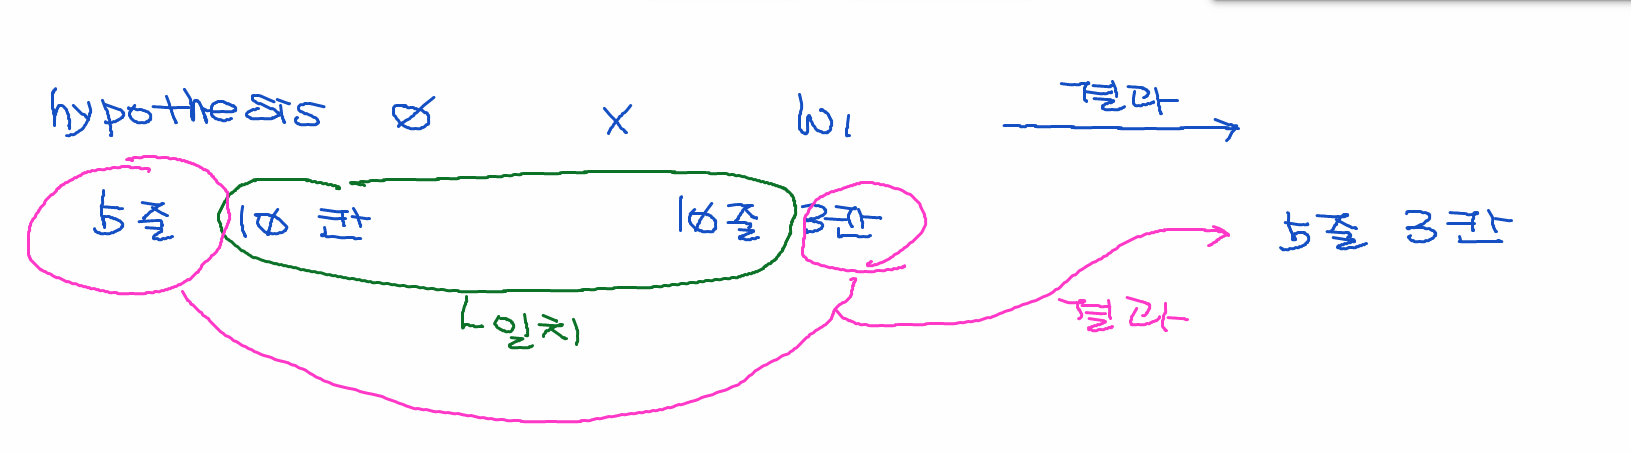

In [ ]:
# 3칸으로 맞춰야댐
w1 = tf.Variable(initializer([10,3]))
b1 = tf.Variable(initializer([3]))

In [ ]:
tf.matmul(hypothesis0,w1)+b1

<tf.Tensor: id=68, shape=(5, 3), dtype=float32, numpy=
array([[ 0.167499  , -0.67444956, -1.1947976 ],
       [ 0.07245505, -0.8276396 , -1.1908693 ],
       [-0.00859272, -0.6507273 , -1.2896948 ],
       [ 0.167499  , -0.67444956, -1.1947976 ],
       [ 0.08282441, -0.5009754 , -1.281189  ]], dtype=float32)>

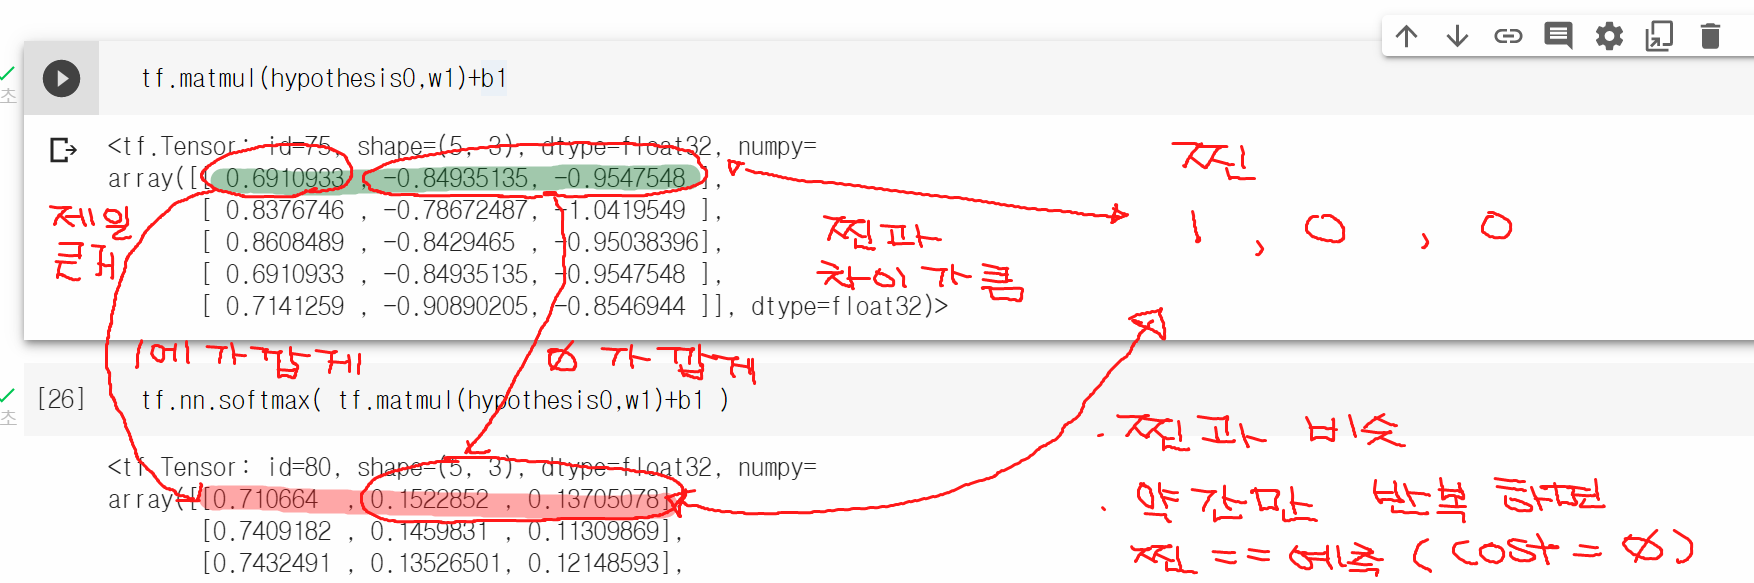

In [ ]:
# 활성함수 softmax 출력
hypothesis1 = tf.nn.softmax( tf.matmul(hypothesis0,w1)+b1 )

In [ ]:
hypothesis1

<tf.Tensor: id=73, shape=(5, 3), dtype=float32, numpy=
array([[0.5927886 , 0.25541487, 0.15179656],
       [0.5919809 , 0.24065869, 0.16736045],
       [0.5543547 , 0.29168376, 0.15396152],
       [0.5927886 , 0.25541487, 0.15179656],
       [0.551448  , 0.30758384, 0.14096817]], dtype=float32)>

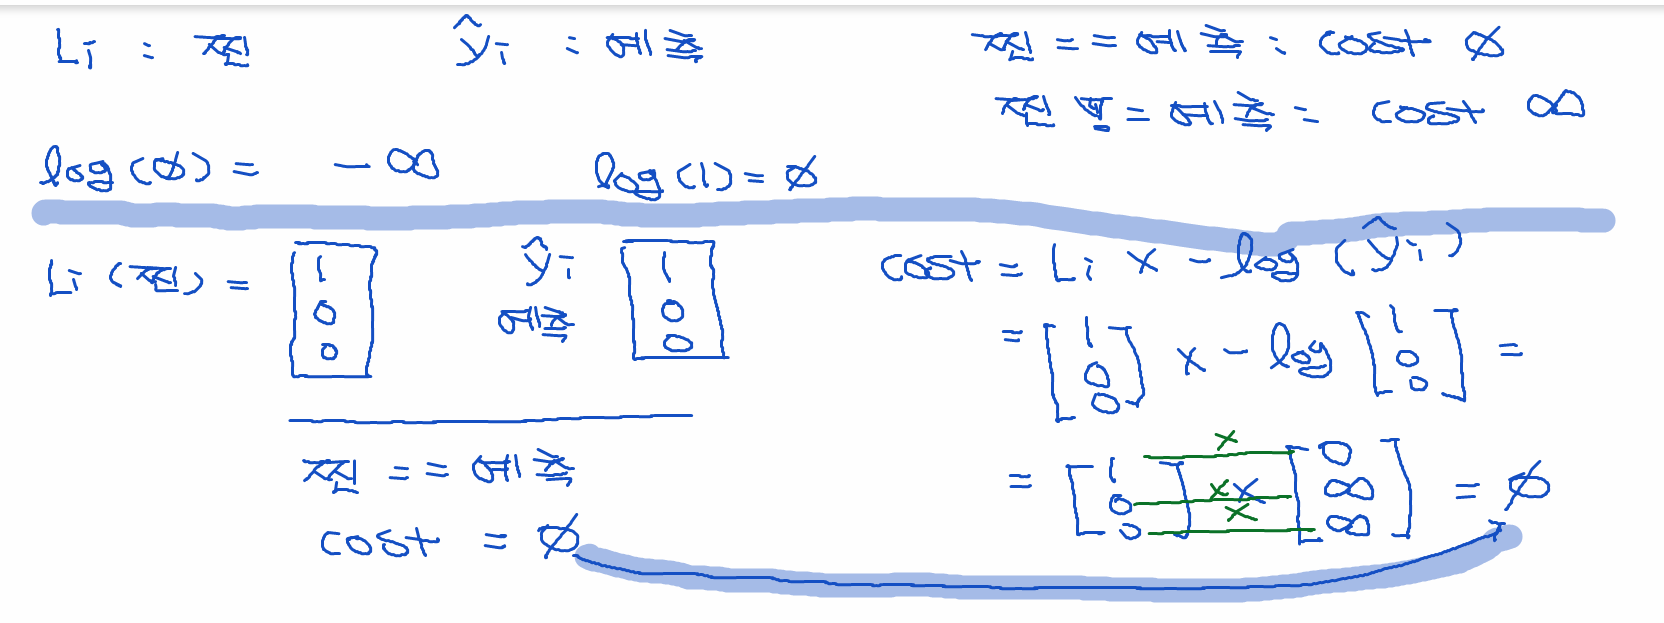

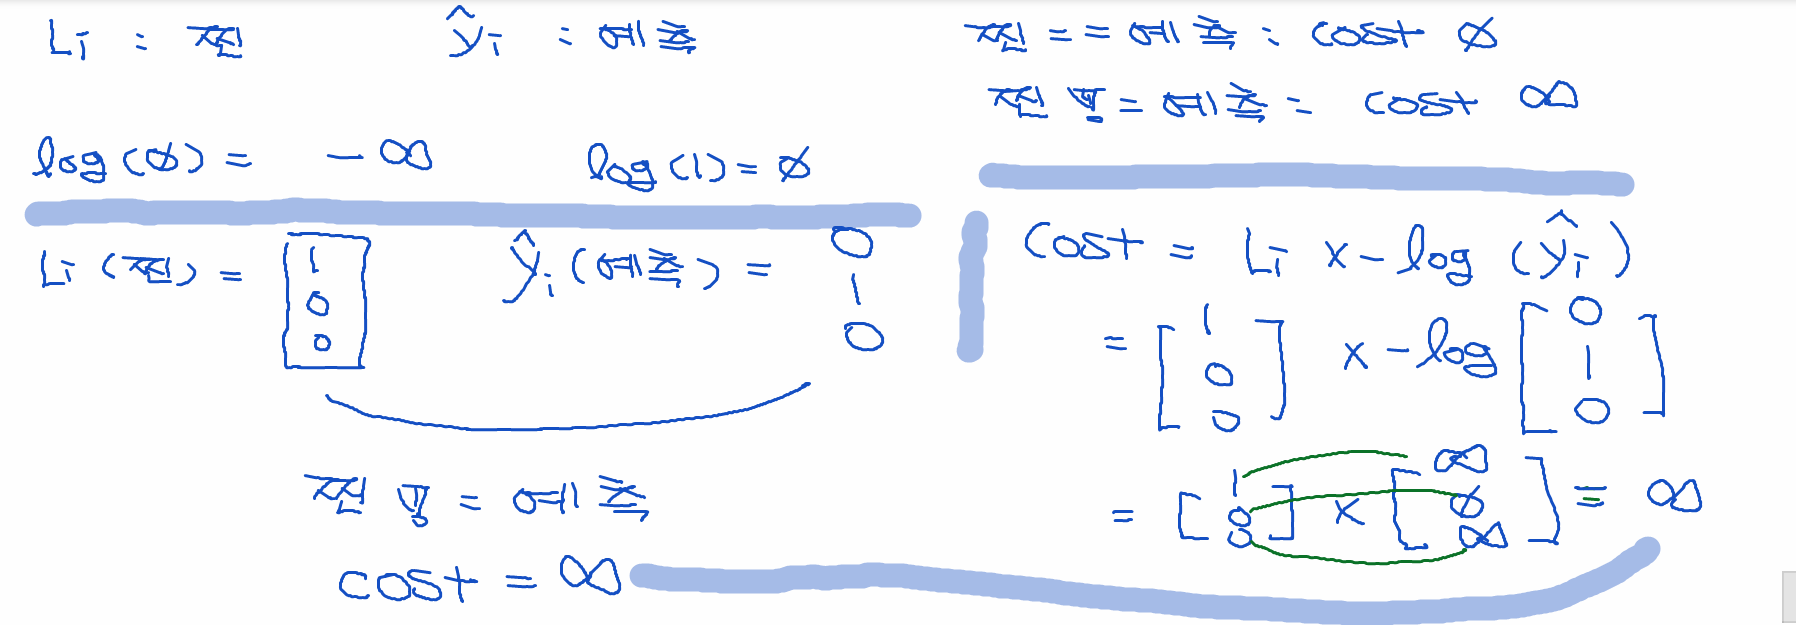

In [ ]:
# 오차
cost = -tf.reduce_mean( y * tf.log(hypothesis1))
cost

<tf.Tensor: id=79, shape=(), dtype=float32, numpy=0.42003232>

In [ ]:
w1

<tf.Variable 'Variable:0' shape=(10, 3) dtype=float32, numpy=
array([[ 0.04093701, -0.2616548 , -0.61293185],
       [ 0.04999232, -0.50178736,  0.21515411],
       [-0.01489121,  0.1145106 , -0.43420696],
       [-0.5932217 ,  0.55443656,  0.39640772],
       [ 0.01340997,  0.564975  , -0.6255053 ],
       [-0.5577518 , -0.55882746,  0.30161965],
       [-0.48622915,  0.10362256, -0.47584713],
       [ 0.03581071, -0.661181  , -0.49540138],
       [-0.3632958 , -0.29828948, -0.44712436],
       [ 0.18825245, -0.15377522, -0.55882084]], dtype=float32)>

In [ ]:
optimizer = tf.train.AdamOptimizer(0.01)

for step in range(1001):
  with tf.GradientTape() as tape:

    hypothesis0 = tf.sigmoid(tf.matmul(X,w0)+b0)
    hypothesis1 = tf.nn.softmax(tf.matmul(hypothesis0,w1)+b1)

    cost = -tf.reduce_sum(y*tf.log(hypothesis1)/len(hypothesis1))

    grads = tape.gradient(cost,[w0,w1,b0,b1])

    optimizer.apply_gradients(grads_and_vars=zip(grads,[w0,w1,b0,b1]))


In [ ]:
# 예측
hypothesis0 = tf.sigmoid(tf.matmul(X, w0)+b0)

predict = tf.nn.softmax(tf.matmul(hypothesis0, w1)+b1)

# predict 각줄에서 최댓값의 인덱스를 리턴
predict01 = tf.argmax(predict,1)
predict01

<tf.Tensor: id=82289, shape=(5,), dtype=int64, numpy=array([0, 1, 2, 0, 2])>

In [ ]:
# y 각줄에서 최댓값의 인덱스 리턴
target = tf.argmax(y, 1)
target

# 맞으면 true, 아니면 false
ac01 = tf.equal(predict01, target)
print('진짜와 일치하는가? =', ac01)
print('='*100)

ac02 = tf.cast(ac01, dtype="float32")
print('변환=',ac02)


# 변환한 값 0,1의 합을 구한 후 데이터의 개수로 나눔
ac03 = tf.reduce_mean(ac02)
print('='*100)

acc = tf.reduce_mean(tf.cast(tf.equal(predict01, target),dtype=tf.float32))
print('정확도=',acc.numpy())

진짜와 일치하는가? = tf.Tensor([ True  True  True  True  True], shape=(5,), dtype=bool)
변환= tf.Tensor([1. 1. 1. 1. 1.], shape=(5,), dtype=float32)
정확도= 1.0


# 다중 분류를 이용한 포유류, 조류분류(텐서플로 1.x)

- 285 ~ 310

In [ ]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [ ]:
import tensorflow as tf
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
tf.enable_eager_execution()
tf.__version__

'1.15.2'

In [ ]:
# 훈련 데이터
X = np.array([
              [0, 0],
              [1, 0],
              [1, 1],
              [0, 0],
              [0, 1],
], dtype = 'float32')

# 정답 데이터
y = np.array([
              [1, 0, 0],
              [0, 1, 0],
              [0, 0, 1],
              [1, 0, 0],
              [0, 0, 1],
], dtype = 'float32')

In [ ]:
# cost가 0으로 수렴하는데 적절한 w,b 선택해줌
initializer = tf.contrib.layers.xavier_initializer()

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [ ]:
# weight
w0 = tf.Variable(initializer([2, 10]))

# bias
b0 = tf.Variable(initializer([10]))

# weight
w1 = tf.Variable(initializer([10, 3]))

# bias
b1 = tf.Variable(initializer([3]))

In [ ]:
# 1차 예측
# 예측 
hypothesis0 = tf.matmul(X, w0) + b0

# 예측값을 0~1 사이의 값으로 변환
hypothesis0  = tf.sigmoid(hypothesis0)

# 2차 예측
# 예측 
hypothesis1 = tf.matmul(hypothesis0, w1) + b1

# 활성화 함수 softmax
# softmax 함수 -> 확률로 나타내는데, 진짜인거 같은것에 높은 확률을 줌
hypothesis1 = tf.nn.softmax(hypothesis1)

print(hypothesis1)

tf.Tensor(
[[0.21499588 0.09673163 0.6882724 ]
 [0.21138947 0.10209084 0.68651974]
 [0.21949922 0.0960512  0.6844496 ]
 [0.21499588 0.09673163 0.6882724 ]
 [0.2258333  0.09332795 0.6808388 ]], shape=(5, 3), dtype=float32)


In [ ]:
optimizer = tf.train.AdamOptimizer(0.01)

In [ ]:
for step in range(1001):
  with tf.GradientTape() as tape:
    hypothesis0 = tf.sigmoid(tf.matmul(X, w0)+b0)

    hypothesis1 = tf.nn.softmax(tf.matmul(hypothesis0, w1)+ b1)

    cost = -tf.reduce_mean(y * tf.log(hypothesis1))

    grads = tape.gradient(cost, [w0, w1, b0, b1])

    optimizer.apply_gradients(grads_and_vars = zip(grads, [w0, w1, b0, b1]))

    if step % 100 ==0:
      print("=" * 50)
      print("step: {}, cost:{}".format(step, cost.numpy()))
      print("="*50)

step: 0, cost:0.40798234939575195
step: 100, cost:0.11125652492046356
step: 200, cost:0.02056073024868965
step: 300, cost:0.007721001747995615
step: 400, cost:0.004094456788152456
step: 500, cost:0.002564608585089445
step: 600, cost:0.0017687507206574082
step: 700, cost:0.0012985155917704105
step: 800, cost:0.0009958649752661586
step: 900, cost:0.00078880216460675
step: 1000, cost:0.0006404047016985714


In [ ]:
# 예측
hypothesis0 = tf.sigmoid(tf.matmul(X, w0) +b0)

predict = tf.nn.softmax(tf.matmul(hypothesis0, w1) +b1)

# 각 줄의 최댓값 인덱스 리턴
predict01 = tf.argmax(predict,1)

# 정답값의 최댓값 인덱스 리턴
target = tf.argmax(y, 1)

# 두개가 동일한지 비교 -> True, Flase
ac01 = tf.equal(predict01,target)

# True -> 1, False -> 0으로 변환
ac02 = tf.cast(ac01, dtype = "float32")

# 정확도
ac03 = tf.reduce_mean(ac02)
print("정확도 : ",ac03.numpy())

정확도 :  1.0


# 다중분류 텐서플로 2.x

In [ ]:
%tensorflow_version 2.x
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

TensorFlow is already loaded. Please restart the runtime to change versions.


In [ ]:
X

array([[0., 0.],
       [1., 0.],
       [1., 1.],
       [0., 0.],
       [0., 1.]], dtype=float32)

In [ ]:
y

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.]], dtype=float32)

In [ ]:
# 입력값을 읽어서 예측을 할 객체 생성
model = Sequential()

# 출력 10칸 / 입력 2칸
model.add(Dense(10,input_dim = 2, activation='sigmoid'))
# 출력 3칸
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 33        
Total params: 63
Trainable params: 63
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# w0,w1,b0,b1 찾는 방법 설정
# loss 오차 -> 합이 최소가 되는 w0,w1,b0,b1 찾음 
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.01), metrics=['acc'])

In [ ]:
model.fit(X,y,epochs=1000)

Train on 5 samples
Epoch 1/1000
5/5 [==============================] - 0s 76ms/sample - loss: 1.2003 - acc: 0.6000
Epoch 2/1000
5/5 [==============================] - 0s 1ms/sample - loss: 1.1679 - acc: 0.4000
Epoch 3/1000
5/5 [==============================] - 0s 1ms/sample - loss: 1.1376 - acc: 0.4000
Epoch 4/1000
5/5 [==============================] - 0s 737us/sample - loss: 1.1095 - acc: 0.4000
Epoch 5/1000
5/5 [==============================] - 0s 1ms/sample - loss: 1.0835 - acc: 0.4000
Epoch 6/1000
5/5 [==============================] - 0s 1ms/sample - loss: 1.0599 - acc: 0.4000
Epoch 7/1000
5/5 [==============================] - 0s 847us/sample - loss: 1.0385 - acc: 0.4000
Epoch 8/1000
5/5 [==============================] - 0s 796us/sample - loss: 1.0194 - acc: 0.4000
Epoch 9/1000
5/5 [==============================] - 0s 1ms/sample - loss: 1.0026 - acc: 0.4000
Epoch 10/1000
5/5 [==============================] - 0s 869us/sample - loss: 0.9878 - acc: 0.4000
Epoch 11/1000
5/5 [==

In [ ]:
# 예측
predict = model.predict(X)

# predict 각줄에서 최댓값 인덱스 출력
predict01 = np.argmax(predict,1)
# target 각줄에서 최댓값 인덱스 출력
target = np.argmax(y,1)

# 예측값과 타겟이 값으면 true, 다르면 false
predict02 = (predict01 == target)

# 정확도
acc = np.sum(predict02)/len(predict02)
acc

1.0

# 다중 분류를 이용한 포유류, 조류 분류(텐서플로 2.x)

- 302 ~ 312

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np

In [ ]:
# 훈련 데이터
X = np.array([
              [0, 0],
              [1, 0],
              [1, 1],
              [0, 0],
              [0, 1],
], dtype = 'float32')

# 정답 데이터
y = np.array([
              [1, 0, 0],
              [0, 1, 0],
              [0, 0, 1],
              [1, 0, 0],
              [0, 0, 1],
], dtype = 'float32')

In [ ]:
# 객체 생성
model = Sequential()

# 히든레이어 1층
# 입력 칸수 2, 출력 칸수 10
model.add(Dense(10, input_dim = 2, activation = 'sigmoid'))

# 출력 칸수 3
# 선형회귀 후 softmax 사용
model.add(Dense(3, activation = 'softmax'))

model.summary()

# 'categorical_crossentropy' : -(y * tf.log(hypothesis1)) 합이 최소가 되는 w,b찾기
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(learning_rate = 0.01), metrics = ['acc'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 33        
Total params: 63
Trainable params: 63
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X, y, epochs = 1000)

Epoch 1/1000
1/1 [==============================] - 1s 702ms/step - loss: 1.3055 - acc: 0.2000
Epoch 2/1000
1/1 [==============================] - 0s 10ms/step - loss: 1.2671 - acc: 0.2000
Epoch 3/1000
1/1 [==============================] - 0s 6ms/step - loss: 1.2328 - acc: 0.2000
Epoch 4/1000
1/1 [==============================] - 0s 5ms/step - loss: 1.2026 - acc: 0.2000
Epoch 5/1000
1/1 [==============================] - 0s 14ms/step - loss: 1.1760 - acc: 0.0000e+00
Epoch 6/1000
1/1 [==============================] - 0s 7ms/step - loss: 1.1527 - acc: 0.4000
Epoch 7/1000
1/1 [==============================] - 0s 6ms/step - loss: 1.1325 - acc: 0.4000
Epoch 8/1000
1/1 [==============================] - 0s 14ms/step - loss: 1.1149 - acc: 0.4000
Epoch 9/1000
1/1 [==============================] - 0s 10ms/step - loss: 1.0998 - acc: 0.4000
Epoch 10/1000
1/1 [==============================] - 0s 13ms/step - loss: 1.0867 - acc: 0.4000
Epoch 11/1000
1/1 [==============================] - 0s 9m

In [ ]:
predict = model.predict(X)

# 각 줄의 최댓값 인덱스 리턴
predict01 = np.argmax(predict,1)

# 정답값의 최댓값 인덱스 리턴
target = tf.argmax(y, 1)

# 두개가 동일한지 비교 -> True, Flase
predict02 = (predict01 == target)

# 정확도
ac03 = np.sum(predict02)/len(predict02)
print("정확도 : ",ac03)

정확도 :  1.0
